In [1]:
import os
import json
import random

import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from transformers import AutoModel, AutoTokenizer

print(torch.cuda.is_available())

atricles_per_category = 100000

folder_path = './true_data'

categories = ["EC", "ET", "GB", "IS", "LC", "PO", "SO"]

news_titles = []
news_contents = []
labels = []

def extract_part1(file_path):
    with open(file_path, 'r', encoding='utf-8') as f:
        data = json.load(f)
        true_title = data['sourceDataInfo']['newsTitle']
        news_content = data['sourceDataInfo']['newsContent']
        fake_title = data['labeledDataInfo']['newTitle']
        return true_title, fake_title, news_content
    

for category in categories:
    path = folder_path+"/"+f"TL_Part1_Clickbait_Direct_{category}"
    count = 0
    for filename in os.listdir(path):
        count+=1
        if count >= atricles_per_category:
            break
        file_path = os.path.join(path, filename)
        if os.path.isfile(file_path):
            try:
                true_title, fake_title, content = extract_part1(file_path)
                news_titles.append(true_title)
                news_contents.append(content)
                labels.append([1, 0])
                news_titles.append(fake_title)
                news_contents.append(content)
                labels.append([0, 1])
            except (json.JSONDecodeError, KeyError) as e:
                print(f"Error processing {filename}: {e}")
                continue


print("title:", news_titles[:5])
print(len(news_titles))

c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


True
title: ['기관투자가들 속속 스튜어드십 코드 도입', '기관 투자자가 기업의 중장기 발전을 이끌기 위해 도입', '공공구매에 사회가치 본격 반영', '사회적 경제 활성화를 위한 정부의 노력, 공공 기관도 이행하는 중', '금융권, 중소·벤처기업 지원에 앞장']
80212


In [2]:
test_index = 12
print(news_titles[test_index], end="\n")
print(news_contents[test_index])
print(labels[test_index])
print(torch.cuda.device(0))
print(torch.cuda.device_count())
print(torch.cuda.current_device())
print(torch.cuda.get_device_name(0))

황상규 센터장, \"공공기관 사회적 가치, 국제 표준으로 이해하면 수월\"
사회적 책임에 대한 국제 표준 ISO 26000을 활용해 현 정부가 추진하는 공공기관의 사회적 가치 창출 정책에 효과적으로 호응하는 방법을 알려주는 설명회가 열렸다.
15일 공공기관사회책임연구원 주최로 열린 2018 사회가치포럼에서 황상규 KQA CSR센터장이 `사회적 가치 관점에서 본 사회책임 국제표준(ISO26000) 개요`를 주제로 발표에 나섰다.
2010년 만들어진 사회적 책임에 대한 국제표준 ISO 26000에 대한 일반적인 오해가 있다.
흔히, 기업의 사회적 책임에 대한 표준이라고 여기는 것이다.
반면, ISO 26000 원문에 기업은 등장하지 않는다.
모든 형태의 조직에 대한 지침이라는 표현이 등장한다.
황 센터장은 이점에 착안해 ISO 26000의 관점으로 공공기관의 사회적 가치를 재해석했다.
황 센터장은 강의 시작에 앞서 \"사회적 가치라고 해서 완전히 새롭게 무언가를 찾으려고 하면 어렵다. 그동안 해왔던 방식을 ISO 26000으로 방향을 잘 잡으면 쉽게 할 수 있다.\"고 말했다.
이어 그는 \"정부에서 추진하는 다양한 평가 방식에 일일이 대응하면 너무 많다는 이야기가 있다. 그러나 ISO 26000의 7대 주제인 지배구조, 인권, 노동관행, 환경, 공정운영 관행, 소비자 이슈, 지역사회 참여 및 발전을 통해 접근하면 어떤 질문에도 다 대응할 수 있다. 그런 점에서 유용하다\"고 설명했다.
그는 \"현재 사회공헌팀과 국정정책 담당팀으로 분리되어 있는데 (ISO 26000을 활용하면) 한 번에 정리할 수 있다\"고 말했다.
그는 사회적 가치 전략 수립에 있어서 ISO 26000에서 설명하고 있는 사회적 책임 원칙을 따라 수립할 것을 강조했다.
ISO 26000의 사회적 책임 7대 원칙은 `설명책임`, 투명성`, `윤리적 행동`, `이해관계자 이익 존중`, `법률 존중`, `국제행동규범 존중`, `인권 존중`이다.
그 밖에도 그는 \"이해관계자 식별하는 것이 중요하다. 

In [3]:
data = []

for i in range(len(labels)):
    data.append([news_titles[i], news_contents[i], labels[i]])

del news_titles
del news_contents
del labels

random.shuffle(data)

train_titles = []
train_contents = []
labels = []

for d in data:
    train_titles.append(d[0])
    train_contents.append(d[1])
    labels.append(d[2])

In [4]:
test_index = 15
print(train_titles[test_index])
print(train_contents[test_index])
print(labels[test_index])

산림청, 연예인 홍보대사 추가 위촉
개그맨 김병만, 가수 장윤정 등 연예인 8명이 산림청 홍보대사로 추가 위촉됐다.
산림청은 개그맨 김병만, 가수 장윤정, 마야, 박상철, 최진희, 윤형빈, 김영희, 박준규씨 등 연예인 8명을 ‘산림청 홍보대사’로 추가 위촉했다고 18일 밝혔다.
새로 위촉된 연예인들은 등산문화 홍보단’에 가입해 스스로 등산을 즐기며 자연스럽게 산림문화 등을 홍보하게 된다. 연예인 산악회원을 주축으로 구성된 ‘등산문화 홍보단’은 산림의 중요성을 알리고 올바른 등산문화를 정착시키기 위해 산림청이 지난해 구성했으며 이봉원, 이용식, 김종국, 남진, 정수라, 김보성, 김병찬, 황영조 등 21명이 활동하고 있다.
이번에 새로 등산문화 홍보단에 새로 합류한 산림청 홍보대사들은 식목일, 산의 날 행사 참여를 비롯해 산불조심 캠페인, 산림청 공익 광고 출연, 언론매체 기고, 강연, 산림홍보 프로그램 출연 등 다양한 역할을 맡게된다.
산림청은 이날 서울 한 호텔에서 새로 홍보단에 가입한 산림청 홍보대사들에게 위촉장을 전달했다.
전범권 산림청 산림이용국장은“올해는 유엔이 정한‘세계 산림의 해’로 유엔기후변화협약 당사자 회의 등 주요 행사들이 국내에서 열리게 된다”며 “산림의 중요성을 일반에 알리는 데 산림청 홍보대사들이 큰 역할을 할 것으로 기대된다”고 말했다.
[1, 0]


In [5]:
cnt=0 # # of clickbait
for label in labels:
    if label == [0, 1]:
        cnt+=1
print(cnt)

40106


### Preprocessing

### Model

In [6]:
# import torch
# import torch.nn as nn
# import torch.nn.functional as F
# from torch.utils.data import Dataset, DataLoader
# from transformers import BertTokenizer, BertModel

class NewsConsistencyDataset(Dataset):
    def __init__(self, headlines, article_bodies, labels, tokenizer, max_headline_len=128, max_article_len=1024):
        self.headlines = headlines
        self.article_bodies = article_bodies
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_headline_len = max_headline_len
        self.max_article_len = max_article_len

    def __len__(self):
        return len(self.headlines)

    def __getitem__(self, idx):
        headline = str(self.headlines[idx])
        article = str(self.article_bodies[idx])
        
        headline_encoding = self.tokenizer.encode_plus(
            headline,
            add_special_tokens=True,
            max_length=self.max_headline_len,
            padding='max_length',
            truncation=True,
            return_attention_mask=True,
            return_tensors='pt'
        )
        
        article_encoding = self.tokenizer.encode_plus(
            article,
            add_special_tokens=True,
            max_length=self.max_article_len,
            padding='max_length',
            truncation=True,
            return_attention_mask=True,
            return_tensors='pt'
        )

        return {
            'headline_ids': headline_encoding['input_ids'].squeeze(0),
            'headline_mask': headline_encoding['attention_mask'].squeeze(0),
            'article_ids': article_encoding['input_ids'].squeeze(0),
            'article_mask': article_encoding['attention_mask'].squeeze(0),
            'labels': torch.tensor(self.labels[idx], dtype=torch.float)
        }

class CrossAttention(nn.Module):
    def __init__(self, hidden_size, num_heads=8):
        super().__init__()
        self.attention = nn.MultiheadAttention(hidden_size, num_heads=num_heads, batch_first=True)
        self.norm = nn.LayerNorm(hidden_size)
        self.linear = nn.Linear(hidden_size, hidden_size)

    def forward(self, query, key, value, key_padding_mask=None):
        attn_output, _ = self.attention(query, key, value, key_padding_mask=key_padding_mask)
        attn_output = self.norm(attn_output + query)
        return self.linear(attn_output)

class NewsConsistencyChecker(nn.Module):
    def __init__(self):
        super().__init__()
        self.tokenizer = AutoTokenizer.from_pretrained("monologg/kobert", trust_remote_code=True)
        self.bert = AutoModel.from_pretrained("monologg/kobert")

        for param in self.bert.parameters():
            param.requires_grad = False
        
        self.hidden_size = self.bert.config.hidden_size
        self.reduced_size = self.hidden_size // 2
        
        self.headline_projection = nn.Linear(self.hidden_size, self.reduced_size)
        self.article_projection = nn.Linear(self.hidden_size, self.reduced_size)
        
        self.cross_attention_1 = CrossAttention(self.reduced_size)
        self.cross_attention_2 = CrossAttention(self.reduced_size)
        
        self.classifier = nn.Sequential(
            nn.Linear(self.reduced_size * 4, self.reduced_size),
            nn.ReLU(),
            nn.Dropout(0.1),
            nn.Linear(self.reduced_size, self.reduced_size // 2),
            nn.ReLU(),
            nn.Dropout(0.1),
            nn.Linear(self.reduced_size // 2, 2),
            nn.Softmax(dim=-1),
        )

    def forward(self, headline_ids, headline_mask, article_ids, article_mask):
        headline_output = self.bert(
            headline_ids,
            attention_mask=headline_mask,
            return_dict=True
        )

        chunk_size = 512

        input_chunks = [
                article_ids[:, i * chunk_size : (i + 1) * chunk_size]
                for i in range((1024 + chunk_size - 1) // chunk_size)
            ]
        attention_mask_chunks = [
                article_mask[:, i * chunk_size : (i + 1) * chunk_size]
                for i in range((1024 + chunk_size - 1) // chunk_size)
            ]

        outputs = []
        for input_chunk, mask_chunk in zip(input_chunks, attention_mask_chunks):
            with torch.no_grad():
                output = self.bert(
                    input_ids=input_chunk,
                    attention_mask=mask_chunk,
                    return_dict=True
                )
                outputs.append(output.last_hidden_state)
        
        headline_embeddings = headline_output.last_hidden_state
        article_embeddings = torch.cat(outputs, dim=1)
        
        headline_proj = self.headline_projection(headline_embeddings)
        article_proj = self.article_projection(article_embeddings)
        
        headline_attended = self.cross_attention_1(
            headline_proj, article_proj, article_proj, key_padding_mask=~article_mask.bool(),
        )
        article_attended = self.cross_attention_1(
            article_proj, headline_proj, headline_proj, key_padding_mask=~headline_mask.bool(),
        )
        
        headline_attended = self.cross_attention_2(
            headline_attended, article_attended, article_attended, key_padding_mask=~article_mask.bool(),
        )
        article_attended = self.cross_attention_2(
            article_attended, headline_attended, headline_attended, key_padding_mask=~headline_mask.bool(),
        )
        
        headline_pool = torch.mean(headline_attended, dim=1)
        article_pool = torch.mean(article_attended, dim=1)
        headline_max, _ = torch.max(headline_attended, dim=1)
        article_max, _ = torch.max(article_attended, dim=1)
        
        combined = torch.cat([headline_pool, article_pool, headline_max, article_max], dim=1)
        return self.classifier(combined)

In [7]:
train_losses = []
validation_losses = []
train_accuracies = []
validation_accuracies = []

def train_model(model, train_loader, val_loader, device, num_epochs=10):
    optimizer = torch.optim.AdamW(model.parameters(), lr=2e-5)
    criterion = nn.CrossEntropyLoss()
    
    for epoch in range(num_epochs):
        model.train()
        total_loss = 0
        correct = 0
        total = 0
        
        for batch_idx, batch in enumerate(train_loader):
            optimizer.zero_grad()
            
            inputs = {
                'headline_ids': batch['headline_ids'].to(device),
                'headline_mask': batch['headline_mask'].to(device),
                'article_ids': batch['article_ids'].to(device),
                'article_mask': batch['article_mask'].to(device)
            }
            labels = torch.argmax(batch['labels'], dim=1).to(device)
            
            try:
                outputs = model(**inputs)
                loss = criterion(outputs, labels)
                
                loss.backward()
                optimizer.step()
                
                total_loss += loss.item()
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()
                
                if (batch_idx + 1) % 10 == 0:
                    print(f'\r> Epoch {epoch + 1}, Batch {batch_idx + 1}, Loss: {loss.item():.4f}', end="")
                    
            except RuntimeError as e:
                print(f"Error in batch {batch_idx}: {str(e)}")
                print(f"Headline shape: {inputs['headline_ids'].shape}")
                print(f"Article shape: {inputs['article_ids'].shape}")
                continue

        train_losses.append(total_loss / len(train_loader))
        train_accuracies.append(100 * correct / total)

        model.eval()
        val_loss = 0
        correct = 0
        total = 0
        
        with torch.no_grad():
            for batch in val_loader:
                inputs = {
                    'headline_ids': batch['headline_ids'].to(device),
                    'headline_mask': batch['headline_mask'].to(device),
                    'article_ids': batch['article_ids'].to(device),
                    'article_mask': batch['article_mask'].to(device)
                }
                labels = torch.argmax(batch['labels'], dim=1).to(device)
                
                outputs = model(**inputs)
                loss = criterion(outputs, labels)
                
                val_loss += loss.item()
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()

        validation_losses.append(val_loss / len(val_loader))
        validation_accuracies.append(100 * correct / total)
        
        print()
        print(f'Epoch {epoch + 1}:')
        print(f'Training Loss: {train_losses[-1]:.4f}')
        print(f'Training Accuracy: {train_accuracies[-1]:.2f}%')
        print(f'Validation Loss: {validation_losses[-1]:.4f}')
        print(f'Validation Accuracy: {validation_accuracies[-1]:.2f}%')

tokenizer = AutoTokenizer.from_pretrained("monologg/kobert", trust_remote_code=True, requires_grad=False)

dataset = NewsConsistencyDataset(
    headlines=train_titles,
    article_bodies=train_contents,
    labels=labels,
    tokenizer=tokenizer,
    max_headline_len=128,
    max_article_len=1024,
)

del train_titles
del train_contents
del labels

train_size = int(0.95 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = torch.utils.data.random_split(dataset, [train_size, val_size])

train_loader = DataLoader(train_dataset, batch_size=35, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=35)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = NewsConsistencyChecker().to(device)

train_model(model, train_loader, val_loader, device)

> Epoch 1, Batch 2170, Loss: 0.4141
Epoch 1:
Training Loss: 0.4485
Validation Accuracy: 86.18%
Validation Loss: 0.4062
Validation Accuracy: 90.28%
> Epoch 2, Batch 2170, Loss: 0.3691
Epoch 2:
Training Loss: 0.4093
Validation Accuracy: 89.95%
Validation Loss: 0.4018
Validation Accuracy: 90.78%
> Epoch 3, Batch 2170, Loss: 0.4156
Epoch 3:
Training Loss: 0.4007
Validation Accuracy: 90.86%
Validation Loss: 0.3929
Validation Accuracy: 91.60%
> Epoch 4, Batch 2170, Loss: 0.3582
Epoch 4:
Training Loss: 0.3964
Validation Accuracy: 91.33%
Validation Loss: 0.3895
Validation Accuracy: 92.00%
> Epoch 5, Batch 2170, Loss: 0.3698
Epoch 5:
Training Loss: 0.3921
Validation Accuracy: 91.73%
Validation Loss: 0.3890
Validation Accuracy: 92.12%
> Epoch 6, Batch 2170, Loss: 0.3544
Epoch 6:
Training Loss: 0.3888
Validation Accuracy: 92.12%
Validation Loss: 0.3865
Validation Accuracy: 92.40%
> Epoch 7, Batch 2170, Loss: 0.3737
Epoch 7:
Training Loss: 0.3868
Validation Accuracy: 92.32%
Validation Loss: 0.3830

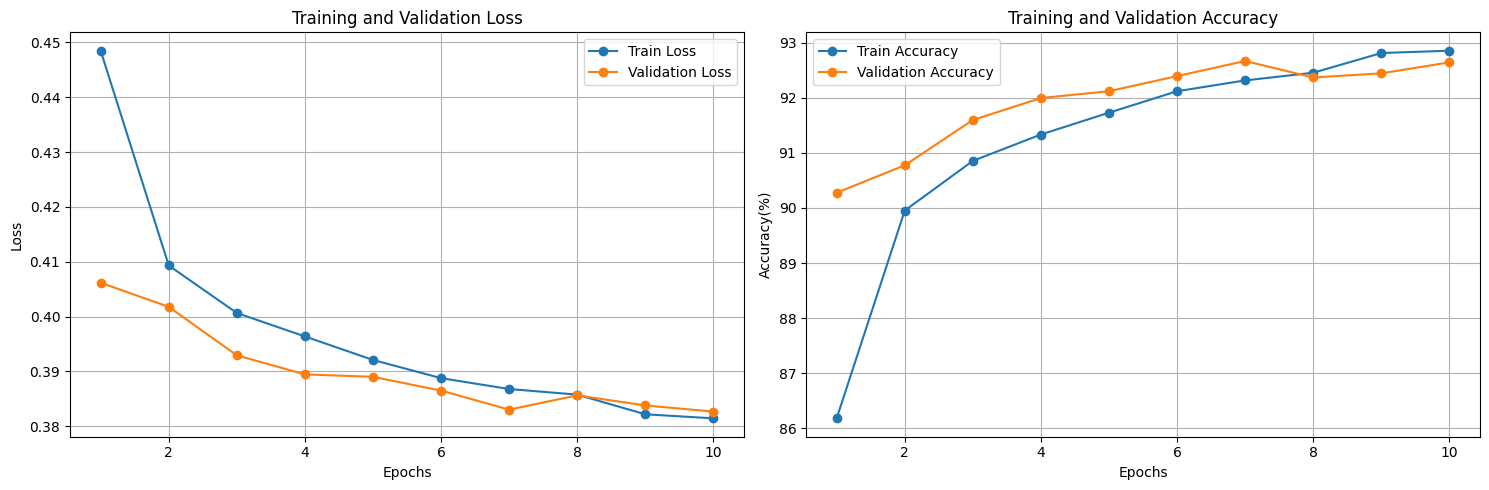

In [8]:
import matplotlib.pyplot as plt

# train_losses = [0.4481, 0.4092, 0.4011, 0.3950, 0.3924, 0.4481, 0.4092, 0.4011, 0.3950, 0.3924]
# validation_losses = [0.4127, 0.3956, 0.3875, 0.3868, 0.3910, 0.4481, 0.4092, 0.4011, 0.3950, 0.3924]
# train_accuracies = [89.60, 91.47, 92.22, 92.40, 91.92, 0.4481, 0.4092, 0.4011, 0.3950, 0.3924]
# validation_accuracies = [8.0, 91.47, 92.22, 92.40, 91.92, 0.4481, 0.4092, 0.4011, 0.3950, 0.3924]

epochs = range(1, len(train_losses)+1)

plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, train_losses, label='Train Loss', marker='o')
plt.plot(epochs, validation_losses, label='Validation Loss', marker='o')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracies, label='Train Accuracy', marker='o')
plt.plot(epochs, validation_accuracies, label='Validation Accuracy', marker='o')
plt.xlabel('Epochs')
plt.ylabel('Accuracy(%)')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [19]:
model.eval()

real_data = NewsConsistencyDataset(
    headlines=["여성 창업가에 대한 선입견이요? \'그냥 사업가로 봐주셨으면..\'", "中 화성탐사선 착륙 성공..."],
    # article_bodies=["여러 의혹에도 불구하고 박현의 바보설은 사실이 아닌 것으로 들어났다. 박현은 멍청이가 아니었다."],
    article_bodies=["""
\"여성 창업가에 대한 선입견이요? 확실히 없다고 말하긴 어렵죠. 하지만 차이가 있다는 사실을 인정할 필요가 있다고 생각해요.\" 김미균 시지온 대표(29)는 여성 창업가로 활동한 경험을 토대로 편견에 대해 인정할 부분은 인정해야 한다고 밝혔다.
그는 2007년부터 소셜 댓글 서비스 라이브리(LiveRe)를 운영해왔다.
창업가가 상대해야 하는 투자자나 고객사 등은 대부분 남성이다.
남성들끼리는 술자리를 가지며 친해지는 경우가 많다.
이렇게 사업 파트너로 발전하기도 한다.
남성 창업가에게는 밤늦게 술 한 잔 하자고 연락해도 부담이 없지만 여성 창업가에게는 쉽지 않다.
그는 \"한 번의 술자리가 미묘한 한 끗 차이를 만들어내는 것 같다\"며 \"투자의 경우 속 깊은 이야기가 오가는 술자리도 중요한 미팅 중 하나인데 투자자가 쉽게 연락해도 부담 없는 남성 창업자가 좀 더 유리한 측면이 있다고 생각한다\"고 말했다.
하지만 \"남녀 창업가 사이에 차이가 있음을 인정하고 이를 빨리 극복하는 것이 현명하다고 생각한다\"고 덧붙였다 ◇스스로 만든 편견 버리고 차이 인정하니… 창업에 나섰던 2007년 당시 그는 21살 대학생이었다.
국회의원, 대기업이 주요 고객사였던 만큼 '나이 어린 여성 창업가'란 점이 영향을 미칠 수밖에 없었다.
첫 고객사를 유치하기까지 꼬박 3년이 걸렸다.
그는 \"어리고 경험 없는 여성 창업가란 점을 스스로 인식하다보니 미팅에서도 자신감 없이 우물쭈물 했었다\"며 \"지레 짐작으로 상대방이 편견을 가지고 있을 거란 가정을 내렸다\"고 회고했다.
실제로 그는 '여자가 무슨 사업을 한다고…'식의 차별적 발언을 들어 본 적은 없다고 밝혔다.
김 대표는 오히려 여성 창업가에 대한 편견은 누구나 있을 수 있다는 생각이 들었다.
고객 입장에서도 경험 없고 나이도 어린 여성을 비즈니스 파트너로 쉽게 신뢰하긴 어려울 거라고 이해헀다.
어쩔 수 없는 부분이 있음을 인지하고 서비스에 더욱 집중하기로 마음을 고쳤다.
그러자 자신감이 붙기 시작했다.
그는 \"스스로 '여성 대 남성' 구도를 뛰어넘으니 상대방을 비즈니스 관계자로 대할 수 있게 됐고 자신감 있게 사업을 진행할 수 있었다\"고 전했다.
시지온에 투자를 결정한 곽계민 포스코기술투자 심사역은 \"일부에서 여성은 비즈니스 마인드가 부족하다는 편견이 있는데 이는 성별과 상관없이 청년 창업가들에게서 공통적으로 볼 수 있는 단점\"이라며 \"김 대표는 그동안 수많은 시행착오에도 꿋꿋이 극복해냈다. 이 점이 투자를 결정한 이유 중 하나\"라고 말했다.
이어 \"영업에서도 술자리 대신 실력만으로 해결해나가는 여성 창업가들이 많다\"며 \"남성들보다 더 경쟁력 있다는 방증 아니겠느냐\"고 덧붙였다.
◇여성의 강점 '분석력' 김 대표는 \"여성이 하나의 사안을 다각도로 분석할 줄 아는 능력이 있다고 생각한다\"고 말했다.
남성 창업가가 사업을 추진할 때 저돌적인 경향이 있다면 여성은 리스크·시장 상황·성공 가능성 등을 종합적으로 고려해 판단할 수 있다는 것이다.
실제로 시지온도 새로운 사업을 추진하자는 의견이 모인 적이 있었다.
일부 경영진이 추진 의사를 강하게 내비쳤다.
하지만 김 대표의 판단 결과 해당 시장에는 경쟁이 심해 성공 가능성이 낮아 보였다.
그는 도전하도록 하되 최소한의 인력과 자금만 투입하기로 했다.
1년 반 만에 해당 사업을 접었지만 김 대표의 분석력으로 손해를 최소화할 수 있었다.
그는 \"이사진에 여성들이 포진해 있는 스타트업이 늘어나고 있는데 이런 능력 때문이 아닌가 생각한다\"고 덧붙였다.
마지막으로 그는 여성이 아니라 창업가로 봐줬으면 하는 바람이 있다고 했다.
그는 \"실제로 비즈니스 관계로 교류해보면 성별에는 큰 차이가 없다\"며 \"'여성이라서 어떤 단점이 있더라'는 식이 아니라 그냥 창업가로 판단해줬으면 한다\"고 전했다.""",
"""
중국의 화성 무인탐사선 ‘톈원(天問) 1호’가 15일 오전 7시18분(중국시간) 화성 유토피아 평원 남부에 안착했다.
톈원1호의 착륙 성공으로, 중국은 미국과 옛소련에 이어 지구상에서 세 번째로 화성에 탐사선을 착륙시킨 나라가 됐다.
중국 관영 신화통신 등에 따르면 이번 착륙은 중국이 지난해 7월 23일 톈원 1호를 쏘아 올린 지 약 10개월 만이다.
톈원 1호는 발사 후 약 7개월간 4억7000여만㎞를 비행한 끝에 지난 2월에 화성 궤도에 진입했다.
톈원1호는 이날 오전 1시쯤 대기(待機) 궤도에서 하강해 화성 진입 궤도에 들어섰다.
오전 4시쯤 착륙선이 궤도선에서 분리돼 나와 3시간 정도 비행했고, 특히 화성 대기권 진입·하강·착륙(EDL)까지 시속 2만㎞에서 제로(0)까지 속도를 줄여야하는 최고난도 구간을 거쳤다.
인류의 화성 탐사 프로젝트 성공률은 약 50%에 불과한데, 실패사례는 대부분 EDL 과정에서 문제가 생겼다.
톈원1호 착륙선은 약 125㎞ 고도에서 화성 대기권에 진입해 낙하산을 펼쳐 속도를 줄였고, 이후 역추진 로켓을 작동해 착륙지점에 내려앉았다.
착륙 이후에는 탐사로봇 ‘주룽(祝融)’이 화성 표면을 밟게 된다.
레이더와 카메라, 탐측기 등을 장착한 주룽은 1시간에 200m를 이동할 수 있으며, 약 3개월 간 화성 토양과 수분, 지질 특징 등을 조사한다.
유토피아 평원은 과거 화성의 바다였던 곳으로 생물체 흔적이 있을 것으로 추정된다.
톈원1호 착륙지점은 과거 바다와 육지가 만나는 해안가였던 것으로 추정되는 곳이다.
평원 지표 아래에는 상당량의 지하수 얼음층이 있다는 연구 결과도 있다.
주룽이 탐사작업을 하는 동안 톈원 1호 궤도선은 지구로 통신을 중계하는 역할을 하며, 화성시간으로 1년(약 23개월) 이상 궤도를 돌며 임무를 수행한다.
우주 탐사 후발국인 중국은 최근 몇 년 사이 굵직한 프로젝트를 잇달아 진행하며 ‘우주굴기’에 나서고 있다.
중국은 2019년 달의 뒷면에 인류 최초로 탐사선 ‘창어(嫦娥) 4호’를 착륙시켰고, 지난달에는 자체 우주정거장 톈허(天和)를 구성할 핵심 모듈을 쏘아 올렸다.
"""],
    labels=[[1,0], [1,0], [1,0]],
    tokenizer=tokenizer,
    max_headline_len=128,
    max_article_len=1024,
)
data_loader = DataLoader(real_data, batch_size=1)

with torch.no_grad():
    for batch_idx, batch in enumerate(data_loader):
        inputs = {
            'headline_ids': batch['headline_ids'].to(device),
            'headline_mask': batch['headline_mask'].to(device),
            'article_ids': batch['article_ids'].to(device),
            'article_mask': batch['article_mask'].to(device)
        }

        outputs = model(**inputs)
        print(outputs.data)
        # print(float(outputs.data[0][0]))
        # print(f"낚시성 기사일 확률: {round(outputs.numpy()[0][0]*100, 2)}%")

tensor([[5.3961e-07, 1.0000e+00]], device='cuda:0')
tensor([[0.0654, 0.9346]], device='cuda:0')
tensor([[0.7965, 0.2035]], device='cuda:0')


In [16]:
torch.save(model.state_dict(), 'final_model_state_dict.pt')


In [18]:
loaded_model = NewsConsistencyChecker()
loaded_model.load_state_dict(torch.load('final_model_state_dict.pt'))

real_data = NewsConsistencyDataset(
    headlines=["박현은 멍청이이다."],
    # article_bodies=["여러 의혹에도 불구하고 박현의 바보설은 사실이 아닌 것으로 들어났다. 박현은 멍청이가 아니었다."],
    article_bodies=["여러 여론조사 결과에 의하면 박현은 멍청이인 것으로 드러났다. 이는 여러 매체에서 검증되며, 흔히 알려진 사실이다.",],
    labels=[1],
    tokenizer=tokenizer,
    max_headline_len=128,
    max_article_len=1024,
)

data_loader = DataLoader(real_data, batch_size=1)

with torch.no_grad():
    for batch_idx, batch in enumerate(data_loader):
        inputs = {
            'headline_ids': batch['headline_ids'].to(device),
            'headline_mask': batch['headline_mask'].to(device),
            'article_ids': batch['article_ids'].to(device),
            'article_mask': batch['article_mask'].to(device)
        }

        outputs = loaded_model(**inputs)
        print(outputs.data)
        # print(float(outputs.data[0][0]))
        # print(f"낚시성 기사일 확률: {round(outputs.numpy()[0][0]*100, 2)}%")

C:\Users\user\AppData\Local\Temp\ipykernel_27632\2274474633.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model.load_state_dict(torch.load('final_model_state_di

RuntimeError: Expected all tensors to be on the same device, but found at least two devices, cpu and cuda:0! (when checking argument for argument index in method wrapper_CUDA__index_select)